In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


$$y = 2x^2 + 3x + 5$$

In [67]:
def generate_quadratic_data(n_samples = 100, noise_std = 1, random_seed = 42):
    np.random.seed(random_seed)
    X = np.random.uniform(-3, 3, n_samples)
    y = 2 * X ** 2 + 3 * X + 5
    y = y + np.random.normal(0, noise_std, n_samples)
    return X.reshape(-1, 1), y


In [68]:
X, y = generate_quadratic_data()


In [69]:
def plot_original_data(X, y):
    plt.scatter(X, y, color = "blue", label = "Actual Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.title("Original Data")
    plt.show()


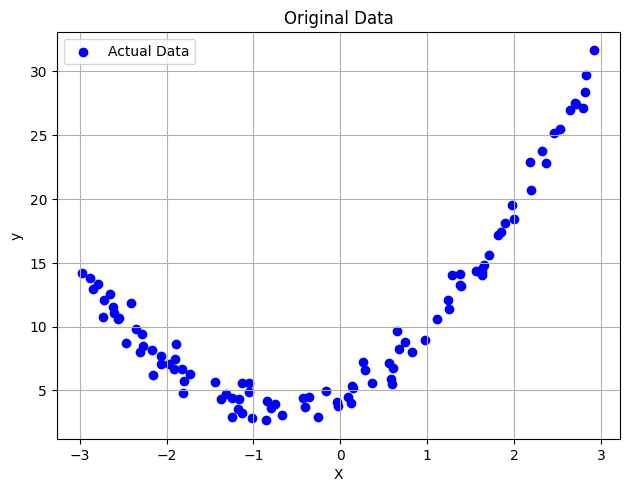

In [70]:
plot_original_data(X, y)


对原始特征进行扩展，把一维或多维的输入特征变成多项式特征。例如，原始特征`x`经过二次多项式扩展后，会变成 `[1, x, x^2]`

注意： 这一步只是“生成”了新的特征，并没有进行拟合或预测。

In [71]:
def training_model(X, y, degree = 2):

    poly = PolynomialFeatures(degree = degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    return model, y_pred


In [72]:
model, y_pred = training_model(X, y)


In [73]:
coefs = model.coef_
intercept = model.intercept_

print(f"Regression coefficient: {np.round(coefs, 2)}")
print(f"Intervept: {np.round(intercept, 2)}")


Regression coefficient: [0.   2.93 2.06]
Intervept: 4.78


In [74]:
expr = f"y = {coefs[2]:.2f}x^2 + {coefs[1]:.2f}x + {intercept:.2f}"

In [75]:
def plot_result(X, y, y_pred, expr):
    sort_idx = X[:, 0].argsort()
    plt.scatter(X, y, color = "blue", label = "Actual Data")
    plt.plot(X[sort_idx], y_pred[sort_idx], color = "red", linewidth = 3, label = expr)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.title("Linear Regression example")
    plt.show()

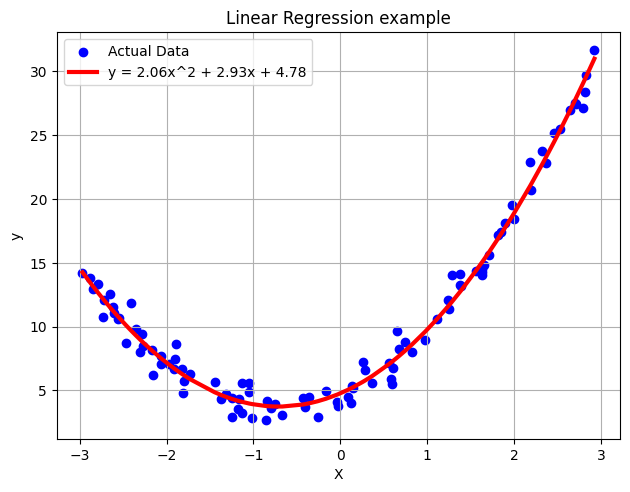

In [76]:
plot_result(X, y, y_pred, expr)

In [77]:
def evaluate_model(y, y_pred):
    mse = mean_squared_error(y, y_pred)

    r2 = r2_score(y, y_pred)

    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    return {"MSE": mse, "R2": r2}


In [78]:
metrics = evaluate_model(y, y_pred)

Mean Squared Error: 0.78
R2 Score: 0.99
